In [1]:
import pandas as pd
import os

In [2]:
Sex=['M','F','Undetermined','ALL']
Gender=input('For this study on which gender do you want the analysis (M/F/Undetermined) ? ')
while Gender not in Sex:
    Gender=input('For this study on which gender do you want the analysis (M/F/Undetermined) ? ')

For this study on which gender do you want the analysis (M/F/Undetermined) ? F


In [3]:
shark=pd.read_csv(r'C:\Users\galic156685\0323_2020DATAPAR\Projects\Project_week 2\GSAF5.csv', encoding="cp1252", sep=',')

In [4]:
#Choose of column
#Rename of column Sex which has a space at the end
df=pd.DataFrame(shark[['Year','Type','Activity','Sex ']])
df=df.rename(columns={'Sex ':'Sex'})

In [5]:
#identifiaction of na value
df.isna().sum()

Year          0
Type          0
Activity    527
Sex         567
dtype: int64

In [6]:
# drop of row with na values -> a missing value conduct a wrong information for the activity. We only want Surfing
df['Activity'].dropna()


0            Surfing
1            Surfing
2            Surfing
3            Surfing
4            Surfing
            ...     
5986        Swimming
5987          Diving
5988    Pearl diving
5989        Swimming
5991        Swimming
Name: Activity, Length: 5465, dtype: object

In [7]:
# Fill N/A with Undetermined because we want the impact of the women / men or what ever his sex
df['Sex'].fillna('Undetermined')

0       M
1       M
2       M
3       M
4       M
       ..
5987    M
5988    M
5989    M
5990    M
5991    M
Name: Sex, Length: 5992, dtype: object

In [8]:
# We filtered on 3 items : 1- Surfing 2-Since 1890 because it the apparition of surf for the public 3- only Unprovoked - we want to show that the sharks are attaking more often
filtered=(df.Activity.str.contains('Surfing'))&(df.Year>1890)&(df.Type.str.contains('Unprovoked'))
df=df.loc[filtered]
df

,Year,Type,Activity,Sex
0,2016,Unprovoked,Surfing,M
1,2016,Unprovoked,Surfing,M
2,2016,Unprovoked,Surfing,M
3,2016,Unprovoked,Surfing,M
4,2016,Unprovoked,Surfing,M
...,...,...,...,...
4430,1944,Unprovoked,Surfing,M
4687,1935,Unprovoked,Surfing,M
4690,1935,Unprovoked,Surfing (pneumatic surfboard),M
5004,1922,Unprovoked,Surfing,M


In [9]:
#creation of the period of ten years to bins my results
labels=[i for i in range(1890,2026,10)]


In [10]:
#creation of cutoffs
cutoffs=tuple([i for i in range(1880,2026,10)])


In [11]:
bins=pd.cut(df.Year, cutoffs,labels=labels)

In [12]:
bins.value_counts()

2010    321
2020    204
2000    180
1990    119
1980     53
1970     16
1960      5
1950      2
1940      2
1930      1
1920      1
1910      0
1900      0
1890      0
Name: Year, dtype: int64

In [13]:
df['bins']=pd.cut(df.Year, cutoffs,labels=labels)
df['Counter']=1
df

,Year,Type,Activity,Sex,bins,Counter
0,2016,Unprovoked,Surfing,M,2020,1
1,2016,Unprovoked,Surfing,M,2020,1
2,2016,Unprovoked,Surfing,M,2020,1
3,2016,Unprovoked,Surfing,M,2020,1
4,2016,Unprovoked,Surfing,M,2020,1
...,...,...,...,...,...,...
4430,1944,Unprovoked,Surfing,M,1950,1
4687,1935,Unprovoked,Surfing,M,1940,1
4690,1935,Unprovoked,Surfing (pneumatic surfboard),M,1940,1
5004,1922,Unprovoked,Surfing,M,1930,1


In [14]:
grouped=df.groupby('bins')['Counter'].agg('sum').reset_index()
grouped

,bins,Counter
0,1890,0
1,1900,0
2,1910,0
3,1920,1
4,1930,1
5,1940,2
6,1950,2
7,1960,5
8,1970,16
9,1980,53


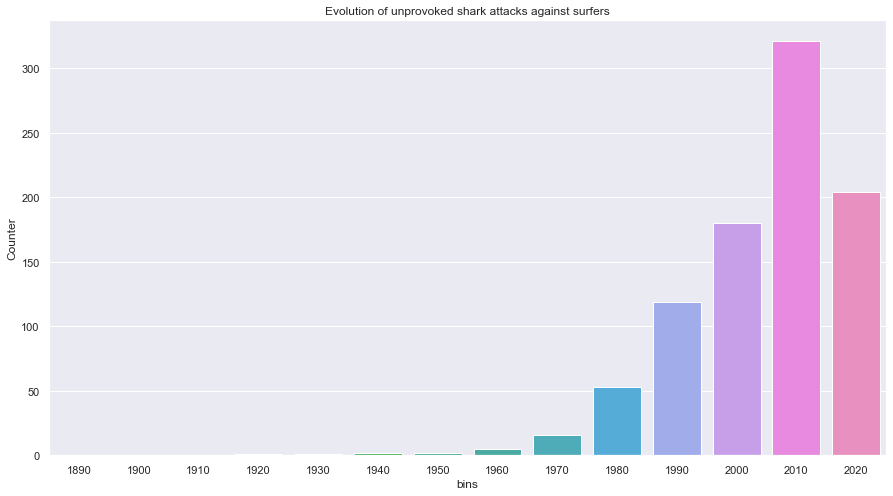

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig,ax=plt.subplots(figsize=(15,8))
barchart=sns.barplot(data=grouped, x='bins',y='Counter')
plt.title("Evolution of unprovoked shark attacks against surfers")
barchart